# Домашнее задание 5
## Линейная регрессия и метод наименьших квадратов
### Щербаков Игорь, СКБ 171
---

Хотим восстановить функциональную зависимость $y(x)=ax+b$

$E(\hat{a},\hat{b})=\sum\limits_{i=1}^{n}\left(\hat{a}x_i+\hat{b}-y_i\right)^2$

Решим систему уравнений:
    
$\begin{cases}
\dfrac{\partial E(\hat{a},\hat{b})}{\partial \hat{a}}=0,\\
\dfrac{\partial E(\hat{a},\hat{b})}{\partial \hat{b}}=0
\end{cases}\Leftrightarrow
\begin{cases}
2\sum\limits_{i=1}^{n}\left[\left(\hat{a}x_i+\hat{b}-y_i\right)\cdot x_i\right]=0,\\
2\sum\limits_{i=1}^{n}\left(\hat{a}x_i+\hat{b}-y_i\right)=0
\end{cases}\Leftrightarrow
\begin{cases}
\hat{a}\sum\limits_{i=1}^{n}x_i^2+\hat{b}\sum\limits_{i=1}^{n}x_i=\sum\limits_{i=1}^{n}x_i y_i,\\
\hat{a}\sum\limits_{i=1}^{n}x_i+\hat{b}n=\sum\limits_{i=1}^{n}y_i
\end{cases}$

$\begin{cases}
\hat{a}n\sum\limits_{i=1}^{n}x_i^2+\hat{b}n\sum\limits_{i=1}^{n}x_i=n\sum\limits_{i=1}^{n}x_i y_i,\\
\hat{a}\left(\sum\limits_{i=1}^{n}x_i\right)^2+\hat{b}n\sum\limits_{i=1}^{n}x_i=\sum\limits_{i=1}^{n}x_i\sum\limits_{i=1}^{n}y_i
\end{cases}\Leftrightarrow
\begin{cases}
\hat{a}\sum\limits_{i=1}^{n}x_i+\hat{b}n=\sum\limits_{i=1}^{n}y_i,\\
\hat{a}\left(n\sum\limits_{i=1}^{n}x_i-\left(\sum\limits_{i=1}^{n}x_i\right)^2\right)=n\sum\limits_{i=1}^{n}x_i y_i - \sum\limits_{i=1}^{n}x_i\sum\limits_{i=1}^{n}y_i
\end{cases}$

$\hat{a}=
\dfrac{n\sum\limits_{i=1}^{n}x_i y_i - \sum\limits_{i=1}^{n}x_i \sum\limits_{i=1}^{n}y_i}{n\sum\limits_{i=1}^{n}x_i^2 - \left(\sum\limits_{i=1}^{n}x_i\right)^2}$

$\hat{b}=\dfrac{\sum\limits_{i=1}^{n}y_i-\hat{a}\sum\limits_{i=1}^{n}x_i}{n}$

Проверим, что найденная точка $\left(\hat{a},\hat{b}\right)$ действительно является экстремумом функции $E$, а именно, точкой локального минимума. (Дисперсия минимальна)

$A=E^{''}_{\hat{a}\hat{a}}=2\sum\limits_{i=1}^{n}x_i^2$

$B=E^{''}_{\hat{a}\hat{b}}=2\sum\limits_{i=1}^{n}x_i$

$C=E^{''}_{\hat{b}\hat{b}}=2n$

Неравенство Коши-Буняковского:

$\left({\sum \limits _{i=1}^{n}{x_{i}}}\right)^{2}\leq \left({\sum \limits _{i=1}^{n}{1}}\right)\sum \limits _{i=1}^{n}{{x_{i}}^{2}}=n\sum \limits _{i=1}^{n}{{x_{i}}^{2}}$

Следовательно:

$AC-B^2=4n\sum\limits_{i=1}^{n}x_i^2-4\left(\sum\limits_{i=1}^{n}x_i\right)^2>0$ , значит, $\left(\hat{a},\hat{b}\right)$ - точка экстремума функции $E$. Кроме того, $C=2n>0$, следовательно, она является точкой локального минимума.

In [11]:
import numpy as np
def coefficients(xs, ys):
    xs = np.array(xs)
    ys = np.array(ys)
    n = len(xs)
    a_estimate = (n*np.dot(xs, ys)-sum(xs)*sum(ys))/(n*sum(xs**2)-sum(xs)**2)
    b_estimate = (sum(ys)-a_estimate*sum(xs))/n
    return a_estimate, b_estimate

В качестве данных используем информацию о продажах домов в Кинг Каунти в США за 2014 год [1]. Попробуем установить наличие зависимости между площадью жилого пространства и ценой дома. 

In [61]:
import pandas as pd
from scipy.optimize import curve_fit
db=pd.read_csv("kc_house_data.csv")
data1 = db['sqft_living'].values
data2 = db['price'].values
db.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Вычислим коэффициент корреляции Пирсона по формуле:

$r_{xy}=\dfrac{\sum\limits_{i=1}^{n}\left(x_i-\overline{x}\right)\left(y_i-\overline{y}\right)}
{\sqrt{\sum\limits_{i=1}^{n}\left(x_i-\overline{x}\right)^2 \sum\limits_{i=1}^{n}\left(y_i-\overline{y}\right)^2}}$,

где $x^n=\left(x_1,\ldots,x_n\right)$, $y^n=\left(y_1,\ldots,y_n\right)$ - выборки

In [54]:
def r_coef(xs, ys):
    xm = np.mean(xs)
    ym = np.mean(ys)
    r = (np.dot(xs-xm, ys-ym))/np.sqrt(sum((xs-xm)**2)*sum((ys-ym)**2))
    return r

In [55]:
r = r_coef(data1, data2)
r

0.7020350546118003

Cуществует прямая зависимость между объемом жилой площади дома и его ценой

In [62]:
a, b = coefficients(data1, data2)
print("Estimate for a = " +str(a))
print("Estimate for b = " +str(b))

Estimate for a = 280.6235678974483
Estimate for b = -43580.74309447424


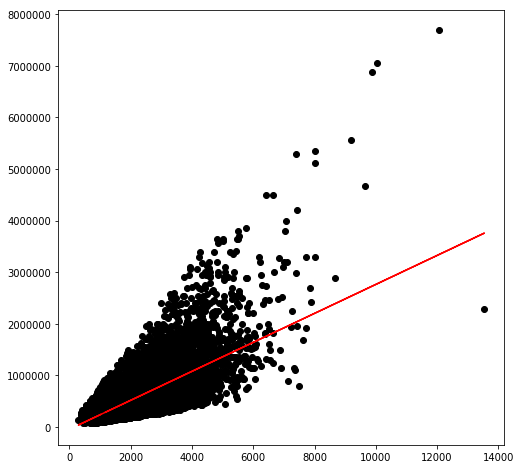

In [63]:
from matplotlib import pyplot as plt
plt.figure(figsize =(8,8))
plt.scatter(x= data1, y=data2, color = "black")
plt.plot(data1, a * data1 + b, color="red")

## Источники
1. House Sales in King County, USA
https://www.kaggle.com/harlfoxem/housesalesprediction